In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [133]:
df = pd.read_csv("healthcare.csv")

In [134]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [135]:
df.shape

(5110, 12)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [137]:
df.drop(['id'], axis=1,inplace=True)

In [138]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [139]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [140]:
df.drop(['work_type'], axis=1,inplace=True)

In [141]:
df.drop(['Residence_type'], axis=1,inplace=True)

In [142]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,166.29,25.6,formerly smoked,0


In [143]:
df["bmi"].fillna(df["bmi"].mean(),inplace=True)


In [144]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [145]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<AxesSubplot:>

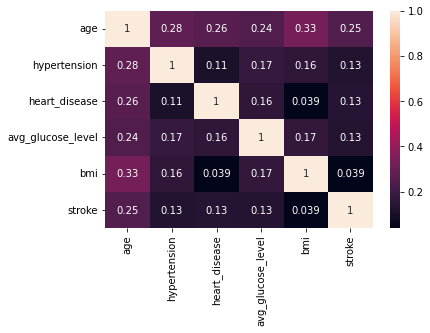

In [146]:
correlation = df.corr()  
sns.heatmap(correlation,annot=True)  

In [147]:
df['ever_married']=df['ever_married'].apply(lambda x : 1 if x=='Yes' else 0)

In [148]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [149]:
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0)


In [150]:
# X=df["gender", "age", "hypertension","heart_disease","ever_married","avg_glucose_level","bmi","smoking_status"]

In [151]:
X=df.iloc[:,0:8]
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,228.69,36.600000,1
1,0,61.0,0,0,1,202.21,28.893237,2
2,1,80.0,0,1,1,105.92,32.500000,2
3,0,49.0,0,0,1,171.23,34.400000,3
4,0,79.0,1,0,1,174.12,24.000000,2
...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.893237,2
5106,0,81.0,0,0,1,125.20,40.000000,2
5107,0,35.0,0,0,1,82.99,30.600000,2
5108,1,51.0,0,0,1,166.29,25.600000,1


In [152]:
y=df.iloc[:,8:9]
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [164]:
model= KNeighborsClassifier()

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [166]:
predictions = model.predict(X_test)

In [167]:
# X_test = df[["gender", "age", "hypertension","heart_disease","ever_married","avg_glucose_level","bmi","smoking_status"]]

In [168]:
# X_test

In [169]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
for i,prediction in enumerate(predictions):
    print("Predictted: %s >>>>>>>   Target: %s" % (prediction,y_test[i]))

KeyError: 0

In [171]:
model.score(X_test,y_test)

0.9397496087636933